# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('datasets/real_estate_data.csv',sep = '\t')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

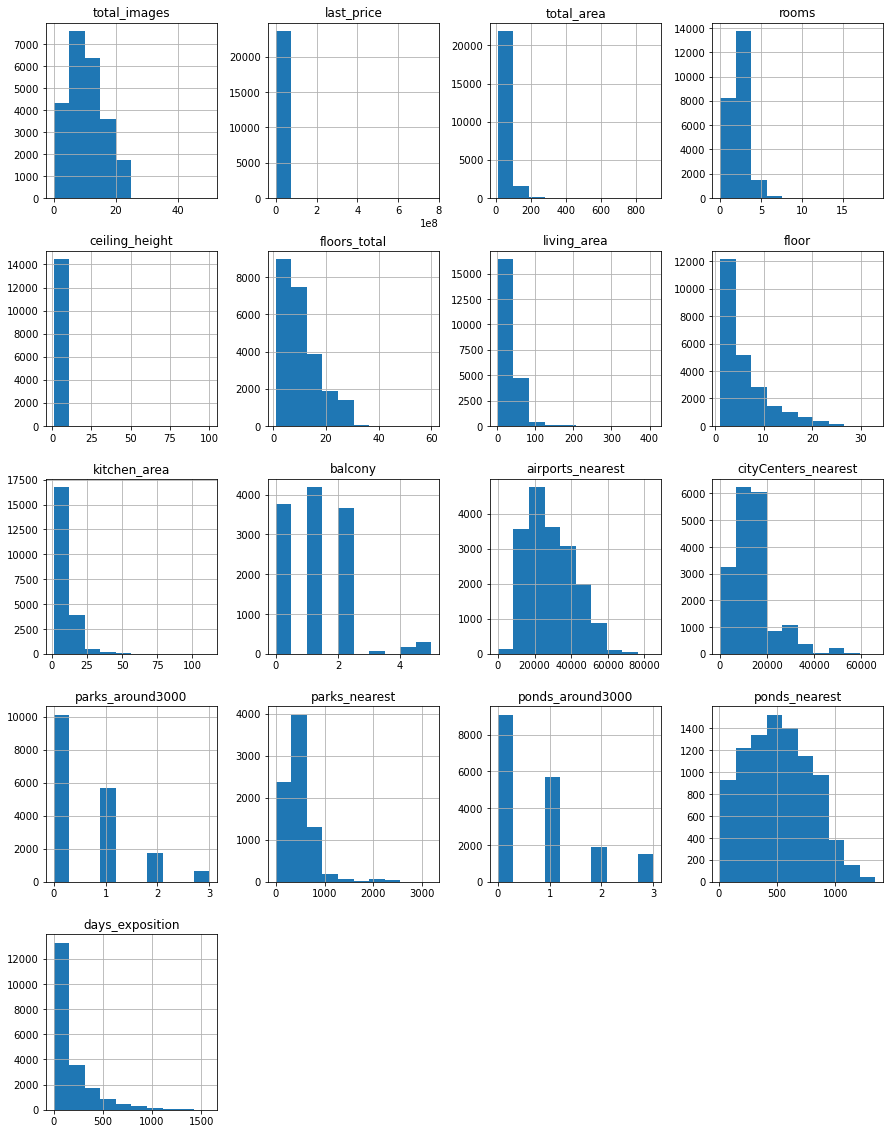

In [2]:
data.hist(figsize=(15, 20)) #общая гистограмма

Выявленные аномалии:

1. Пропуски в столбце ceiling_height 
2. Пропуски в столбце floors_total
3. Пропуски в столбце living_area
4. Огромное количество пропусков в столбце is_apartment.
5. Пропуски в столбце balcony. Возможная потеря данных или неуказание количество балконов в виду их отсутсвия.
6. Значения NaN в столце parks_around3000 и ponds_around3000. Возможная потеря данных или неуказание количество парков или прудов в виду их отсутсвия.
7. Пропуски в locality_name, cityCenters_nearest. days_exposition, ceiling_height, floors_total. Возможные потери данных. 
8. Количество пропусков в parks_around3000 и ponds_around3000 совпадает. При публикации объявления продавцы не указали эти данные
9. Пропуски в столбцах parks_nearest и ponds_nearest. Ориентируемся на количество пустых и 0 значений в столбце parks_around3000 и ponds_around3000 соответсвенно, так как 

### Предобработка данных

Выявляем столбцы:
- возможно восстановить пропуски
- невозможно восстановить пропуски
- не влияющие на исследование

**Восстановить**

- floors_total
- living_area
- kitchen_area


**Не восстановить**

- ceiling_height
- locality_name
- days_exposition - показывает сколько дней было размещено объявление (от публикации до снятия),соответственно, если укзаан NaN, значит объявление еще не снято

**Не влияют**
- is_apartment 
- balcony
- parks_nearest 
- ponds_nearest
- parks_around3000
- ponds_around3000 
- airports_nearest

**Восстановление floors_total**

Смотрим где указали этаж квартиры, но не указана этажность дома и считаем количество таких строк

In [3]:
display(data[data['floors_total'].isna()]['floor'].value_counts().sum())
display(data['floors_total'].isna().sum())

86

86

Количество этих строк совпадает с количеством пропусков в floors_total, соответственно, можно предположить, что продавец указывал последний этаж

Можно заполнить пропуски floors_total значениями floor

In [4]:
data['floors_total'] = data['floors_total'].fillna(0)

def fill_floors_total(row):
    if row[6] == 0:
        row[6] = row[8]
    return row

data = data.apply(fill_floors_total, axis=1)

**Восстановление living_area**

Пропуски можно заполнить используя среднее соотношение жилой площади к общей


In [5]:
living_area_ratio_mean = (data['living_area'] / data['total_area']).mean()
data['living_area'] = data['living_area'].fillna(0)

def living_area(row):
    if row[7] == 0:
        row[7] = float(format(row[2] * living_area_ratio_mean, '.2f'))
    return row

data = data.apply(living_area, axis=1)

Посмотрим на "странные" значения

In [6]:
display(data['living_area'].describe())

count    23699.000000
mean        34.562483
std         22.326966
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Минимальная жилая площадь 2 кв.м. (похоже кто-то продает гроб). Учетная норма в Санкт-Петербурге 9 м2 общей площади жилого помещения для проживающих в отдельных квартирах и жилых домах. Представим себе квартиру в 9 кв.м.: наверняка это студия без балкона и нормальной входной зоны. Даже в такой квартире жилая плозадь не может быть 2 кв.м.

Думаю разумно исключить из датафрейма квартиры с жилой площадью менее 6 кв.м.

In [7]:
display(len(data[data['living_area'] < 6]))

6

Всего 6 квартир, нам будет их не хватать

In [8]:
bad_living_area = data[data['living_area'] < 6]
bad_living_area_index = bad_living_area.index
data.drop(bad_living_area_index, inplace=True)

**Восстановление kitchen_area**

Пропуски можно заполнить используя среднее соотношение площади кухни к общей

In [9]:
kitchen_area_ratio_mean = (data['kitchen_area'] / data['total_area']).mean()
data['kitchen_area'] = data['kitchen_area'].fillna(0)

def kitchen_area(row):
    if row[12] == 0:
        row[12] = float(format(row[2] * living_area_ratio_mean, '.2f'))
    return row

data = data.apply(kitchen_area, axis=1)

**Прочее**

In [10]:
# перевод столбца'first_day_exposition' в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
# столбец 'is_apartment' переводим в формат bool и заполняем пропуски на False
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'] = data['is_apartment'].fillna(False)

Приводим столбец 'days_exposition' к int и заполняем пропуски

'days_exposition' показывает сколько дней было размещено объявление (от публикации до снятия),соответственно, если укзаан NaN, значит объявление еще не снято. 

Заполнение нулями позволит провести анализ этого столбца отсеяв нулевые значения и нам не придётся удалять все строки с пропусками по этому столбцу, что повлияло бы на все данные в целом

In [11]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [12]:
data['last_price'].describe()
# максимальное значение в 763 миллиона не удивляет, достаточно загуглить самые дорогие квартиры в Питере
# а вот минимальное в 12190 уже смущает
# даже если предположить что по ошибке указали цену за квадратный метр то это всё равно мало
# посмотрим еще нереально дешевые объекты, за порог возьмем 500 тысяч
len(data[data['last_price'] < 500000])
# 14 квартир, будет не жалко от них избавиться
bad_last_price = data[data['last_price'] < 500000]
bad_last_price_index = bad_last_price.index
data.drop(bad_last_price_index, inplace=True)

In [13]:
# смотрим уникальные значения ceiling_height
data['ceiling_height'].unique()
# в столбце 'ceiling_height' присутствуют нереальные значения (высота в 1 метр или 100 метров) 
# гуглим нормальную высоту потолков, она варьируется от 2.5 до 3 метров
# но это касается обычных квартир
# не берутся в расчет элитные типы жилья вроде пентхаусов, где высота потолков может достигать 10.3 метров
# ссылка на пентхаус :D https://elitnoe.ru/articles/991-top-5-elitnyh-kvartir-s-vysotoy-potolkov-ot-5-do-10-metrov
# и старенькие частные дома и дачи, где высота может быть и 2 метра
# будем убирать из таблицы все значения не подходящие под здравый смысл, меньше 2 и больше 10.3
bad_ceiling_height1 = data[data['ceiling_height'] > 10.3]
bad_ceiling_height2 = data[data['ceiling_height'] < 2]
# смотрим сколько таких значений
len(bad_ceiling_height1),len(bad_ceiling_height2)
# и убираем их из таблицы
bad_ceiling_height_index1 = bad_ceiling_height1.index
bad_ceiling_height_index2 = bad_ceiling_height2.index
data.drop(bad_ceiling_height_index1, inplace=True)
data.drop(bad_ceiling_height_index2, inplace=True)
# теперь пропуски можно заполнить медианой
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

In [14]:
# столбец balcony нам не пригодится в исследовании
data['balcony'] = data['balcony'].fillna(0).astype('int')
# заполняем пропуски в 'locality_name'
data['locality_name'] = data['locality_name'].fillna('unknown')
# заменяем нулевое кол-во комнат
data['rooms'] = data['rooms'].replace(0,1)

In [15]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        8.3 ,  2.98,

**Вывод:**
Определены пропущенные значения,заполнены пропущенные значения там, где это возможно, так же изменены типы данных.


### Посчитайте и добавьте в таблицу новые столбцы

In [16]:
# добавляем в таблицу столбец с ценой за квадратный метр
data['square_meter_price'] = data['last_price'] / data['total_area']
# добавляем в таблицу столбец дня публикации
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
# месяца
data['exposition_month'] = data['first_day_exposition'].dt.month
# и года
data['exposition_year'] = data['first_day_exposition'].dt.year
# добавляем столбец с типом этажа при помощи функции
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis = 1)
# и столбец с расстоянием до центра города в км
data['km_to_centre'] = data['cityCenters_nearest'] / 1000
# посмотрим что получилось
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,km_to_centre
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,482.0,2.0,755.0,0,120370.370370,3,3,2019,другой,16.028
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый,18.603
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,90.0,2.0,574.0,558,92785.714286,3,8,2015,другой,13.933
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.8,9,True,...,84.0,3.0,234.0,424,408176.100629,4,7,2015,другой,6.800
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой,8.098


### Проведите исследовательский анализ данных

#### Изучим параметры объектов

##### Общая площадь

count    23652.000000
mean        60.367287
std         35.671616
min         12.000000
25%         40.000000
50%         52.000000
75%         69.925000
max        900.000000
Name: total_area, dtype: float64

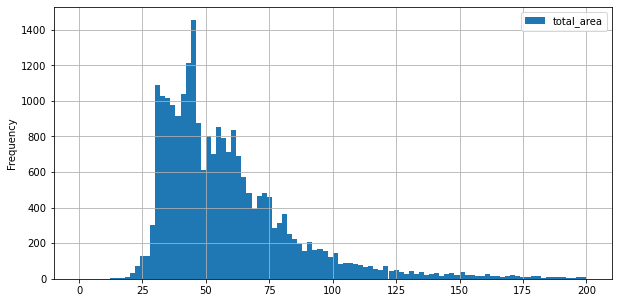

In [17]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,200))
data['total_area'].describe()

##### Жилая площадь

count    23652.000000
mean        34.579472
std         22.336870
min          6.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

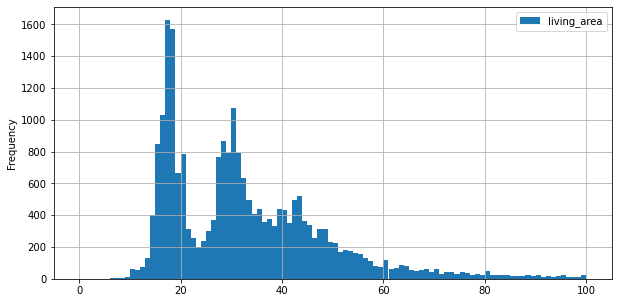

In [18]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,100))
data['living_area'].describe()

##### Площадь кухни

count    23652.000000
mean        12.624594
std         11.069573
min          1.300000
25%          7.340000
50%         10.000000
75%         13.400000
max        282.380000
Name: kitchen_area, dtype: float64

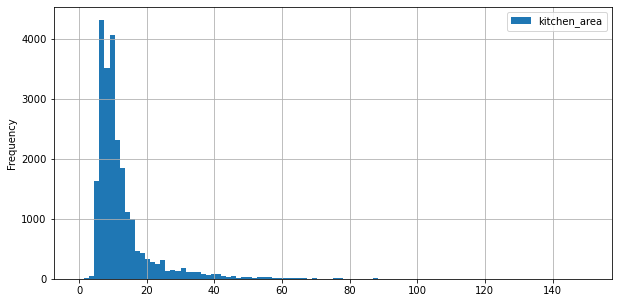

In [19]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,150))
data['kitchen_area'].describe()

##### Цена объекта

count    23652.000000
mean         6.545157
std         10.889527
min          0.500000
25%          3.420000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

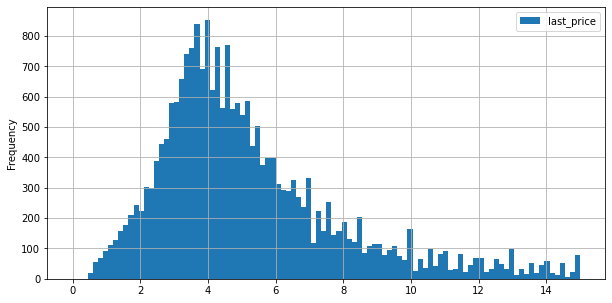

In [20]:
data['last_price'] = data['last_price']/1000000
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15), figsize = (10,5))
data['last_price'].describe()

##### Количество комнат

count    23652.000000
mean         2.079528
std          1.066584
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

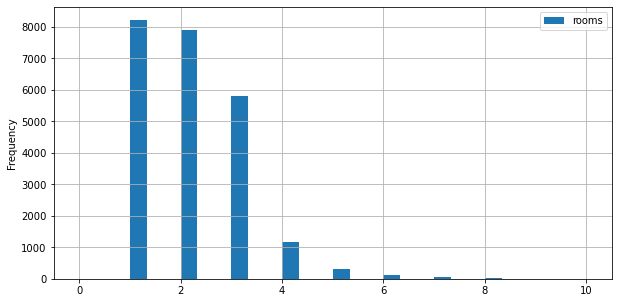

In [21]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (10,5), range=(0,10))
data['rooms'].describe()

##### Высота потолков

count    23652.000000
mean         2.698208
std          0.237178
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

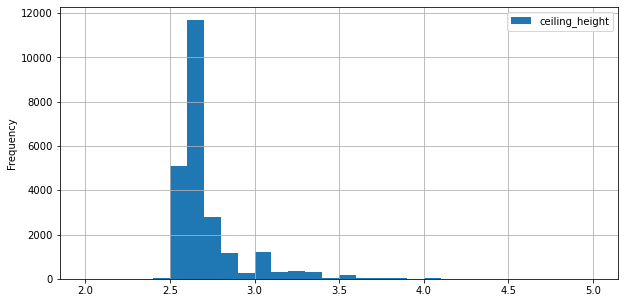

In [22]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (10,5))
data['ceiling_height'].describe()

##### Этаж

count    23652.000000
mean         5.893159
std          4.883052
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

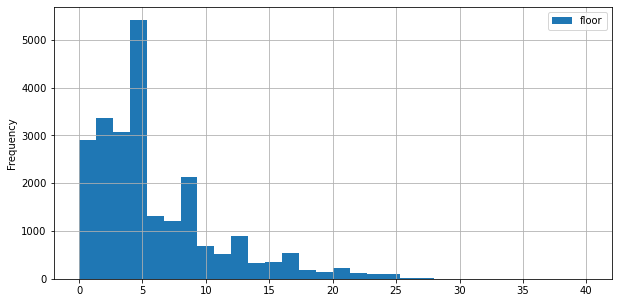

In [23]:
data.plot(y = 'floor', kind = 'hist', bins = 30, range = (0,40), grid=True, figsize = (10,5))
data['floor'].describe()

##### Тип этажа

count      23652
unique         3
top       другой
freq       17335
Name: floor_type, dtype: object

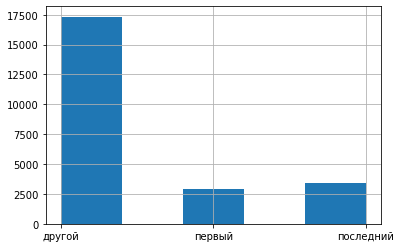

In [24]:
data['floor_type'].hist(bins=5)
data['floor_type'].describe()

##### Общее количество этажей в доме

count    23652.000000
mean        10.674277
std          6.590092
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

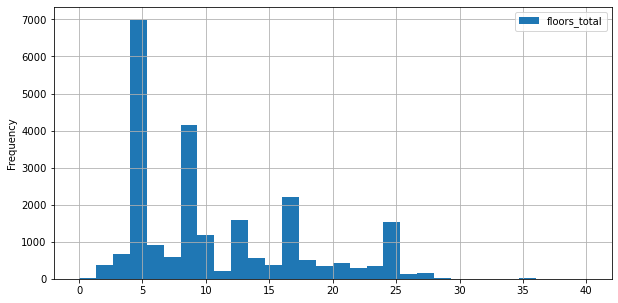

In [25]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, range = (0,40), grid=True, figsize = (10,5))
data['floors_total'].describe()

##### Расстояние до центра города в метрах

count    18157.000000
mean     14192.777606
std       8607.590828
min        181.000000
25%       9238.000000
50%      13101.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

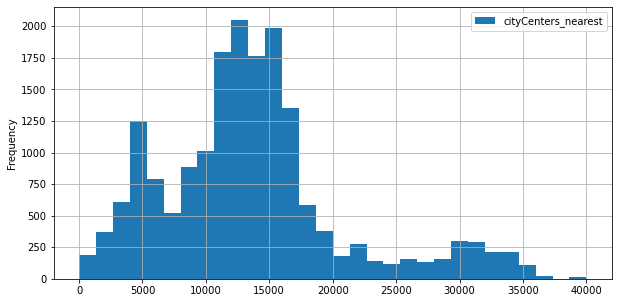

In [26]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, range = (0,40000), grid=True, figsize = (10,5))
data['cityCenters_nearest'].describe()

##### Расстояние до ближайшего аэропорта

count    18134.000000
mean     28795.065788
std      12631.114779
min          0.000000
25%      18582.000000
50%      26726.000000
75%      37282.250000
max      84869.000000
Name: airports_nearest, dtype: float64

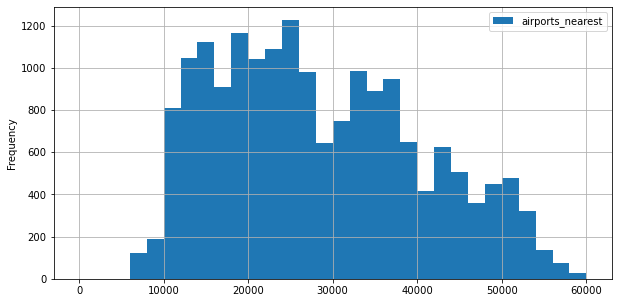

In [27]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, range = (0,60000), grid=True, figsize = (10,5))
data['airports_nearest'].describe()

##### Расстояние до ближайшего парка

count    8067.000000
mean      490.709805
std       342.452714
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

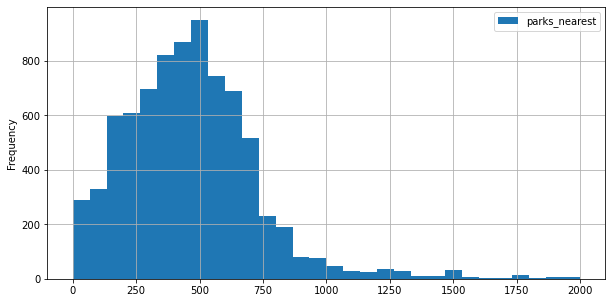

In [28]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 30, range = (0,2000), grid=True, figsize = (10,5))
data['parks_nearest'].describe()

##### День публикации объявления

count    23652.000000
mean         2.569888
std          1.788810
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

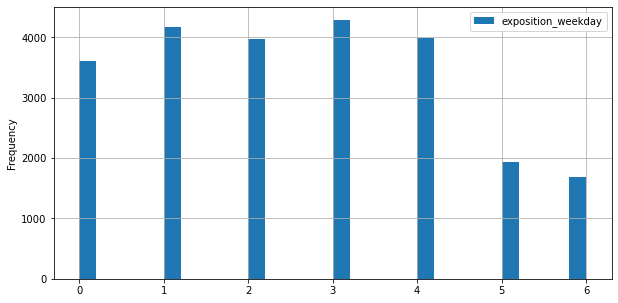

In [29]:
data.plot(y = 'exposition_weekday', kind = 'hist', bins = 30, range = (0,6), grid=True, figsize = (10,5))
data['exposition_weekday'].describe()

##### Месяц публикации объявления

count    23652.000000
mean         6.401319
std          3.491557
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

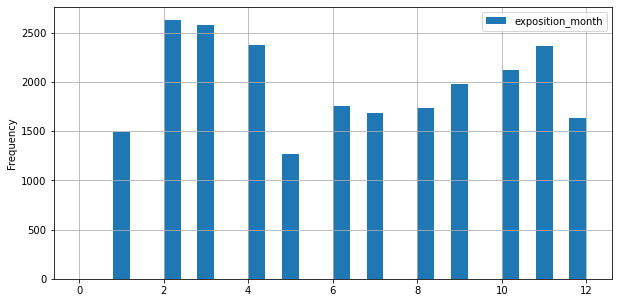

In [30]:
data.plot(y = 'exposition_month', kind = 'hist', bins = 30, range = (0,12), grid=True, figsize = (10,5))
data['exposition_month'].describe()

**Вывод:**

Больше всего на рынке представлены квартиры с площадью от 40 до 70 кв.м.. средняя жилая площадь 30 кв.м., средня площадь кухни 10 кв.м.

Больше всего на рынке однокомнатных и двухкомнатных квартир

Наибольшее число квартир продаются по цене в диапозоне от 2.5 до 5 миллионов

Средняя высота потолков 2.6 м

Наибольшее кол-во квартир расположены на 5 этаже

Большинство квартир продаются в пятиэтажных домах

Чаще квартиры расположены в 10-15 км от центра города и в среднем в 28 км от аэропорта

У большинства квартир на расстоянии в 500 метров есть парк

Чаще всего объявления публикуются в рабочие дни недели

Весной наблюдяется высокая активность публикаций, которая спадает к началу лета. И начиная с осени активность снова растёт


#### Изучим как быстро продавались квартиры

count    20478.000000
mean       180.973191
std        219.827147
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

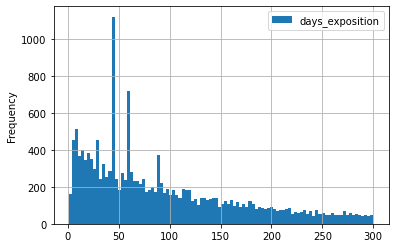

In [31]:
# Построим гистограмму
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,300))
# узнаем среднее и медиану
data[data['days_exposition']!=0]['days_exposition'].describe()
# на гистограмме увидели выбросы, методом value_counts() вычислим их
# data[data['days_exposition']!=0]['days_exposition'].value_counts()

На гистограмме наблюдается распределение Пуассона. 

Среднее значение - 180 дней.

Медиана - 95 дней.

Обнаружены аномалии - 45, 60, 7, 30, 90 считаются как самые популярные дни снятия объявления.

Скорее всего аномалии связаны с правилами сервиса (после определенного кол-ва дней объявление снимается), однако это 
не может давать гарантии того, что в эти дни недвижимость не была продана.

Для точного анализа от аномалий лучше избавиться

count    18418.000000
mean       195.894940
std        226.862439
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

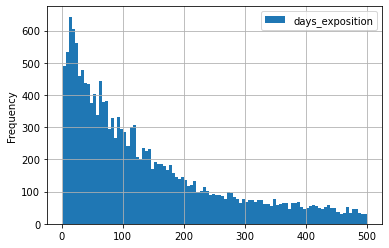

In [32]:
# убираем аномальные значения и смотрим на гистограмму с описанием
good_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,500))
good_data['days_exposition'].describe()

Без аномалий среднее и медаинное значения поменялись (195 и 114 соответственно)

Чтобы ответить на вопрос какие продажи можно считать быстрыми, а какие необычно долгими нам понадобится ящик с усами

(1.0, 700.0)

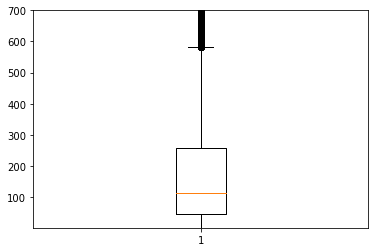

In [33]:
import matplotlib.pyplot as plt
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,700)

По диаграмме раазмаха видно, что нормальные значения у нас расположены от 1 до 600, соответственно все значения за чертой в 600 дней можно считать необычайно долгой продажей

Быстрые продажи можно считать по значению первого квартиля, то есть 44 дня. Все продажи до 44 дней можно считать быстрыми

#### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта

##### Общая площадь

0.6537480551077661

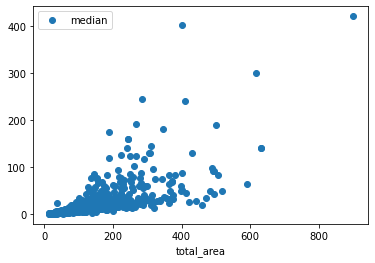

In [34]:
# создаем сводную таблицу
pt_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_total_area.columns = ['mean', 'count', 'median']
pt_total_area.plot(y = 'median', style = 'o')
pt_total_area.sort_values('median', ascending = False)
# методом .corr() узнаем корреляцию
data['total_area'].corr(data['last_price'])

Коэффициент корреляции Пирсона равен 0.653, что свидетельствует о зависимости цены недвижимости от её площади, хоть и не очень большой. Коэффициент положительный, соответственно при росте площади растёт и цена

##### Жилая площадь

0.5864969737326072

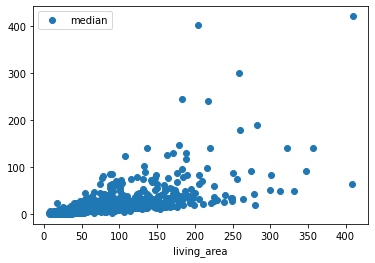

In [35]:
pt_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_living_area.columns = ['mean', 'count', 'median']
pt_living_area.plot(y = 'median', style = 'o')
pt_living_area.sort_values('median', ascending = False)
data['living_area'].corr(data['last_price'])

Коэффициент корреляции Пирсона равен 0.585, зависимость несколько меньше, чем от общей площади, однако тоже присутствует

##### Площадь кухни

0.4066873461091155

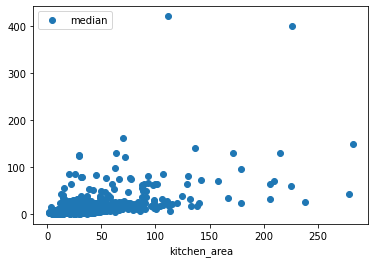

In [36]:
pt_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_kitchen_area.columns = ['mean', 'count', 'median']
pt_kitchen_area.plot(y = 'median', style = 'o')
pt_kitchen_area.sort_values('median', ascending = False)
data['kitchen_area'].corr(data['last_price'])

Коэффициент корреляции Пирсона равен 0.406, зависимость от площади кухни уже ощутимо меньше, чем от общей площади

##### Количество комнат

0.36528338118825004

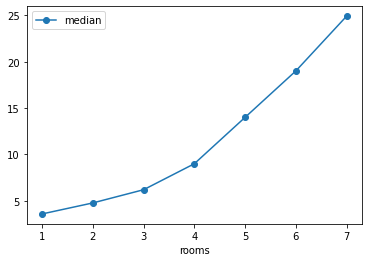

In [37]:
pt_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_rooms.columns = ['mean', 'count', 'median']
pt_rooms.query('count > 50').plot(y = 'median',style = 'o-')
pt_rooms.query('count > 50').sort_values('median', ascending = False)
data['rooms'].corr(data['last_price'])

С увеличением количества комнат, растёт медианная стоимость квартиры

##### Этажи

,mean,count,median
floor_type,,,
другой,6.678372,17335,4.85
первый,4.812061,2909,3.90
последний,7.346883,3408,4.35


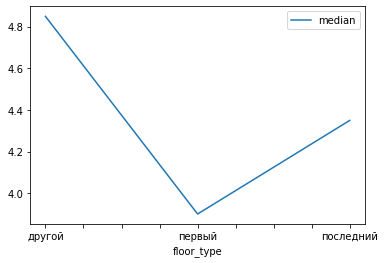

In [38]:
pt_floor_type = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_floor_type.columns = ['mean', 'count', 'median']
pt_floor_type.plot(y = 'median')
pt_floor_type

Квартиры на первом и последнем этажах как правило дешевле, чем квартиры на других этажах

##### Дата размещения

###### День недели

,mean,count,median
exposition_weekday,,,
1,6.384931,4173,4.73
2,6.631655,3966,4.70
0,6.523703,3602,4.65
3,6.713632,4289,4.65
4,6.376302,3993,4.59
5,6.979025,1935,4.56
6,6.258825,1694,4.55


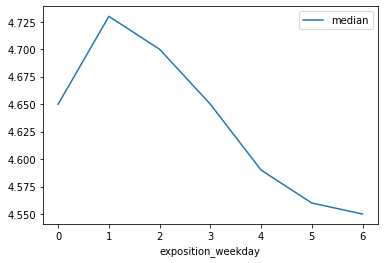

In [39]:
pt_exposition_weekday = data.pivot_table(index = 'exposition_weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_exposition_weekday.columns = ['mean', 'count', 'median']
pt_exposition_weekday.plot(y = 'median')
pt_exposition_weekday.sort_values('median', ascending = False)

Чем ближе к выходным, тем ниже стоимость. С чем это связано, непонятно =\

Возможно, у людей на выходных поднимается настроение и они ставят цены ниже

###### Месяц

,mean,count,median
exposition_month,,,
4,6.739253,2376,4.8000
9,6.827402,1980,4.7000
11,6.438160,2369,4.7000
12,7.020855,1638,4.7000
3,6.367487,2581,4.6850
2,6.477993,2631,4.6500
7,6.661397,1687,4.6500
1,6.674275,1497,4.6000
8,6.359642,1740,4.5950


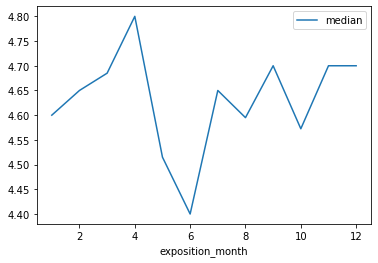

In [40]:
pt_exposition_month = data.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_exposition_month.columns = ['mean', 'count', 'median']
pt_exposition_month.plot(y = 'median')
pt_exposition_month.sort_values('median', ascending = False)

В отличии от зависимости от дней недели, зависимость по месяцам уже даёт общее представление о сезонности на арынке недвижимости

Начиная с пика цен в апреле, к началу лета цены летят вниз. Так же по таблице видно что и предложения летом не очень много. Скорее всего это связано с отпусками, отдыхом и так далее

###### Год

,mean,count,median
exposition_year,,,
2014,12.087136,137,7.70
2015,8.531164,1189,5.35
2019,6.793297,2868,5.05
2018,5.957182,8499,4.56
2016,6.830190,2782,4.55
2017,6.590644,8177,4.50


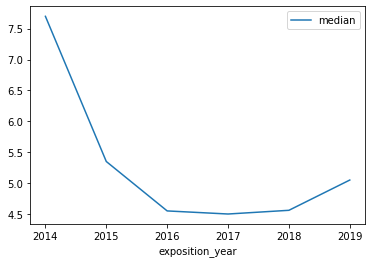

In [41]:
pt_exposition_year = data.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_exposition_year.columns = ['mean', 'count', 'median']
pt_exposition_year.plot(y = 'median')
pt_exposition_year.sort_values('median', ascending = False)

Начиная с 2014 года шло снижение цен на недвижимость

С 2018 года цены пошли вверх

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [42]:
pt_local = data.pivot_table(index = 'locality_name', values = 'square_meter_price', aggfunc=['count', 'mean'])
pt_local.columns = ['count', 'mean']
pt_local = pt_local.sort_values('count', ascending = False).head(10)
display(pt_local)
#самая высокая стоимость
display(pt_local[pt_local['mean']==pt_local['mean'].max()])
#самая низкая стоимость
display(pt_local[pt_local['mean']==pt_local['mean'].min()])

,count,mean
locality_name,,
Санкт-Петербург,15699,114815.936013
посёлок Мурино,519,85695.223835
посёлок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,306,68757.678644
деревня Кудрово,299,92473.547576


,count,mean
locality_name,,
Санкт-Петербург,15699,114815.936013


,count,mean
locality_name,,
Выборг,237,58141.909153


Самая высокая стоимость в Санкт-Петербурге

Самая низкая в Выборге

#### Средняя цена каждого километра в Санкт-Петербурге

In [43]:
data['km_to_centre'] = data['km_to_centre'].fillna(-1)
data['km_to_centre'] = data['km_to_centre'].astype('int')
pt_km = data.query('locality_name == "Санкт-Петербург" and km_to_centre !=-1').pivot_table(index = 'km_to_centre', values = 'square_meter_price', aggfunc = 'mean')
pt_km

,square_meter_price
km_to_centre,
0,187324.130319
1,166603.755531
2,146662.860056
3,129364.513748
4,137475.497055
5,146561.817513
6,152342.205905
7,141399.731456
8,119904.146290


В таблице отражены средние цены за квадратный метр в зависимости от расстояния до центра города

По данным видно, что чем дальше квартира от центра, тем дешевле квадратный метр

### Общий вывод

Полученные данные были обработаны и изучены: определены пропущенные значения,заполнены пропущенные значения там, где это возможно, так же изменены типы данных.

В таблицу были добавлены столбцы: цена одного квадратного метра; день, месяц и год публикации объявления; тип этажа квартиры и расстояние до центра города в километрах.

Были изучены и описаны параметры из которых стало известно что:
Больше всего на рынке представлены квартиры с площадью от 40 до 70 кв.м.. средняя жилая площадь 30 кв.м., средня площадь кухни 10 кв.м..
Больше всего на рынке однокомнатных и двухкомнатных квартир.
Наибольшее число квартир продаются по цене в диапозоне от 2.5 до 5 миллионов.
Средняя высота потолков 2.7 м.
Наибольшее кол-во квартир расположены на 5 этаже.
Большинство квартир продаются в пятиэтажных домах.
Чаще квартиры расположены в 10-15 км от центра города и в среднем в 28 км от аэропорта.
У большинства квартир на расстоянии в 500 метров есть парк.
Чаще всего объявления публикуются в рабочие дни недели.
Весной наблюдяется высокая активность публикаций, которая спадает к началу лета. И начиная с осени активность снова растёт.

По данным таблицы изучили как быстро продаются квартиры
При помощи диаграммы раазмаха узнали, что нормальные значения расположились от 1 до 600 дней, а значит все значения за чертой в 600 дней можно считать необычайно долгой продажей. Быстрые продажи можно считать по значению первого квартиля, то есть 44 дня. Все продажи до 44 дней можно считать быстрыми

Мы узнали какие факторы сильнее всего влияют на стоимость квартиры. Исходя из данных увидели наибольшую зависимость цены от общей площади квартиры. Так же увидели, что квартиры на крайних этажах как правило дешевле. На цену так же влияет и сезон продажи - в начале и конце года цены выше, нежели летом

Мы узнали, что минимальная средняя цена одного квадратного метра среди 10 населённых пунктах с наибольшим числом объявлений в Выборге, а максимальная в Санкт-Петербурге

По данным таблицы вычислили, среднюю цену каждого километра и выяснили, что чем дальше квартира от центра, тем дешевле квадратный метр


